In [2]:
import os
import pyreadstat
import pandas as pd

In [3]:
SAS_FOLDER   = "pubsaf_extracted"

dfs = {}

**Schritt 1: Daten einlesen**

*pyreadstat.read_sas7bdat(..., catalog_file=’format.sas7bcat”)* wird verwendet um 44 .sas7bdat Dateien in ungelabelte Panda-DataFrames zu laden


In [4]:
for fname in os.listdir(SAS_FOLDER):
    if fname.lower().endswith(".sas7bdat"):
        path = os.path.join(SAS_FOLDER, fname)
        print(f"Lade {fname}…")
        df, meta = pyreadstat.read_sas7bdat(path)
        table_name = os.path.splitext(fname)[0]
        dfs[table_name] = df

print("\nFertig. Geladene Tabellen:", list(dfs.keys()))

Lade statjust_li2a.sas7bdat…
Lade tx_ki.sas7bdat…
Lade don_liv_fol.sas7bdat…
Lade cand_kipa.sas7bdat…
Lade donor_live.sas7bdat…
Lade tx_hl.sas7bdat…
Lade rec_histo.sas7bdat…
Lade stathist_kipa.sas7bdat…
Lade treatment.sas7bdat…
Lade immuno.sas7bdat…
Lade tx_hr.sas7bdat…
Lade pra_hist.sas7bdat…
Lade rec_histo_xmat.sas7bdat…
Lade fol_immuno.sas7bdat…
Lade donor_disposition.sas7bdat…
Lade tx_kp.sas7bdat…
Lade tx_li.sas7bdat…
Lade mpexcept.sas7bdat…
Lade txf_lu.sas7bdat…
Lade donor_deceased.sas7bdat…
Lade stathist_liin.sas7bdat…
Lade statjust_hr1a.sas7bdat…
Lade cand_liin.sas7bdat…
Lade tx_pa.sas7bdat…
Lade txf_in.sas7bdat…
Lade malig.sas7bdat…
Lade cand_thor.sas7bdat…
Lade mpexcept_orig_tumors.sas7bdat…
Lade stathist_thor.sas7bdat…
Lade txf_hl.sas7bdat…
Lade txf_ki.sas7bdat…
Lade mpexcept_tumors.sas7bdat…
Lade txf_hr.sas7bdat…
Lade statjust_li2b.sas7bdat…
Lade hist_opo_txc.sas7bdat…
Lade statjust_hr1b.sas7bdat…
Lade txf_kp.sas7bdat…
Lade tx_in.sas7bdat…
Lade institution.sas7bdat…
Lade con

**Schritt 2: Meta-Übersicht**

Lädt alle df automatisch in ein Dictionary df und erstellt Übersichtstabelle mit Tabelle, Anzahl Zeilen und Spalten

In [5]:
meta = pd.DataFrame([
    {"Tabelle": name, "Zeilen": df.shape[0], "Spalten": df.shape[1]}
    for name, df in dfs.items()
]).sort_values("Zeilen", ascending=False).reset_index(drop=True)

display(meta)
meta.to_csv("meta_overview.csv", index=False)

,Tabelle,Zeilen,Spalten
0,fol_immuno,9124602,7
1,txf_ki,4794289,107
2,pra_hist,4425413,10
3,stathist_liin,3778780,62
4,immuno,3605340,6
5,donor_disposition,2486650,18
6,stathist_kipa,2169618,20
7,txf_li,1810035,98
8,rec_histo_xmat,1315079,8
9,cand_kipa,1199290,194


**Schritt 3: Variablenstruktur & Typen**

Für jede Tabelle wird *df.types* ausgegeben, um numerische, zeochen- und Datumsfelder zu unterscheiden. Außerdem werden die größten Tabellen für weitere Analyse identifiziert.

Missing values: Zeigt bei welchen Spalten Daten fehlen und in welche Ausmaß

Unique Values: Unterscheidung von kardinalen und dichteren Features


In [6]:
for name, df in dfs.items():
    print(f"\n=== Tabelle: {name} ===")
    print("Datentypen:")
    print(df.dtypes, "\n")
    # fehlende Werte 
    missing = df.isnull().sum()
    miss = missing[missing > 0].sort_values(ascending=False)
    print("Missing Values:")
    print(miss, "\n")
    # Anzahl eideutiger Werte
    unique = df.nunique()
    print("Unique Values (erste 10 Spalten):")
    print(unique.iloc[:10])
    if len(unique) > 10:
        print("…")



=== Tabelle: statjust_li2a ===
Datentypen:
WL_ORG                        object
PX_ID                        float64
CANHX_STAT_CD                float64
CANHX_STAT_TY                float64
CANHX_INIT_FORM              float64
CANHX_CHG_DT                  object
CAN_LISTING_CTR_CD            object
CAN_LISTING_CTR_TY            object
CANHX_AGE_GROUP               object
CANHX_DGN                     object
CANHX_FORM_STAT              float64
CANHX_ENCEPH_DT               object
CANHX_ENCEPH                 float64
CANHX_ASCITES_DT              object
CANHX_ASCITES                float64
CANHX_BILI_DT                 object
CANHX_BILI                   float64
CANHX_ALBUMIN_DT              object
CANHX_ALBUMIN                float64
CANHX_PROTHROM_DT             object
CANHX_PROTHROM               float64
CANHX_INR_DT                  object
CANHX_INR                    float64
CANHX_OTHER_DISEASE_DT        object
CANHX_OTHER_DISEASE          float64
CANHX_CTP_SCORE              fl

**Schritt 4: Verlgeich Behandlungsgruppen**

Alle drei Kohorten (Niere/Pancreas, Herz/Lunge, Leber/Darm) werden analysiert. Für jede Kohorte wird ein treatment_flag erzeugt, indem geprüft wird, ob PX_ID in irgendeiner Transplant-Tabelle vorkommt. Es wird Alter bei Listing *[CAN_AGE_AT_LISTING]* berechnet und zeigt Count, Mean, Std, Min, Max je Gruppe an. Außerdem werden Geschlechter und Blutgruppen-Verteilungen pro Gruppe analysiert. Zuletzt wird noch ein Histogramm für die Altersverteilung für Treatment (Transplatation erfolgt) vs. Control (Transplatation nicht erfolgt) erzeugt.



In [7]:
import matplotlib.pyplot as plt


=== Kohorte: Kidney/Pancreas ===

Alter bei Listing (CAN_AGE_AT_LISTING):
                 count       mean        std  min   max
treatment_flag                                         
Control         567601  50.685846  13.903746 -4.0  99.0
Treatment       586964  46.765868  15.246249 -1.0  91.0

Geschlechter­verteilung (%):
treatment_flag    False     True 
CAN_GENDER                       
F               0.39678  0.395036
M               0.60322  0.604964

Blutgruppen­verteilung (%):
treatment_flag     False     True 
CAN_ABO                           
A               0.288320  0.359237
A1              0.004309  0.007764
A1B             0.000280  0.000765
A2              0.000666  0.001385
A2B             0.000136  0.000236
AB              0.027846  0.045892
B               0.158901  0.131080
O               0.519529  0.453610
UNK             0.000012  0.000032


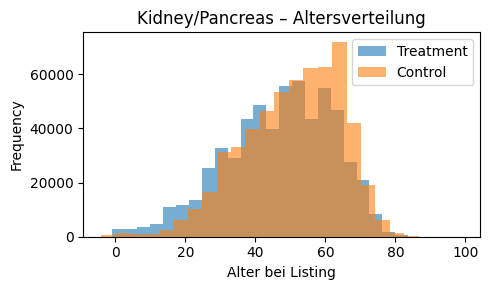


=== Kohorte: Heart/Lung ===

Alter bei Listing (CAN_AGE_AT_LISTING):
                 count       mean        std  min   max
treatment_flag                                         
Control          74067  45.253163  18.929364 -1.0  87.0
Treatment       154662  48.550226  18.192335 -1.0  84.0

Geschlechter­verteilung (%):
treatment_flag     False    True 
CAN_GENDER                       
F               0.357885  0.33099
M               0.642115  0.66901

Blutgruppen­verteilung (%):
treatment_flag     False     True 
CAN_ABO                           
A               0.332937  0.403075
A1              0.001850  0.002414
A1B             0.000081  0.000232
A2              0.000351  0.000413
A2B             0.000068  0.000116
AB              0.029606  0.046484
B               0.114062  0.130214
O               0.520979  0.417051
Z               0.000068  0.000000


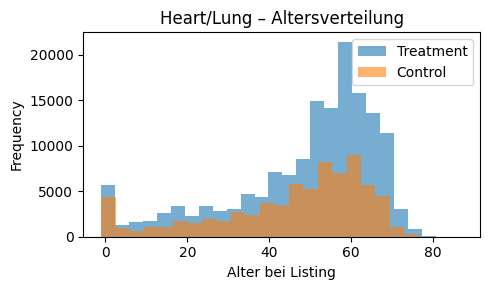


=== Kohorte: Liver/Intestine ===

Alter bei Listing (CAN_AGE_AT_LISTING):
                 count       mean        std  min   max
treatment_flag                                         
Control         157912  49.973435  16.325332 -1.0  86.0
Treatment       227395  47.817393  17.840261 -1.0  86.0

Geschlechter­verteilung (%):
treatment_flag     False     True 
CAN_GENDER                        
F               0.407252  0.378254
M               0.592748  0.621746

Blutgruppen­verteilung (%):
treatment_flag     False     True 
CAN_ABO                           
A               0.367793  0.373229
A1              0.001273  0.001502
A1B             0.000013  0.000105
A2              0.000228  0.000268
A2B             0.000044  0.000070
AB              0.025286  0.047004
B               0.110403  0.131209
O               0.494959  0.446608
UNK             0.000000  0.000004


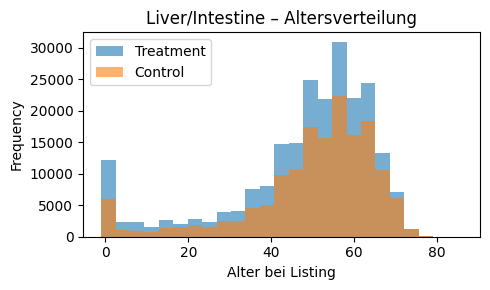

In [8]:
cohorts = {
    "Kidney/Pancreas": {
        "cand": "cand_kipa",
        "tx": ["tx_ki", "tx_kp"],
        "age_col": "CAN_AGE_AT_LISTING"
    },
    "Heart/Lung": {
        "cand": "cand_thor",
        "tx": ["tx_hr", "tx_lu", "tx_hl"],
        "age_col": "CAN_AGE_AT_LISTING"
    },
    "Liver/Intestine": {
        "cand": "cand_liin",
        "tx": ["tx_li", "tx_in"],
        "age_col": "CAN_AGE_AT_LISTING"
    }
}

for name, cfg in cohorts.items():
    print(f"\n=== Kohorte: {name} ===")
    cand = dfs[cfg["cand"]]
    
    # treatment-flag
    treated_ids = set()
    for tx_tbl in cfg["tx"]:
        treated_ids |= set(dfs[tx_tbl]["PX_ID"].dropna())
    cand["treatment_flag"] = cand["PX_ID"].isin(treated_ids)
    
    # Altersstatistiken
    age = cfg["age_col"]
    stats = (
        cand
        .groupby("treatment_flag")[age]
        .agg(["count", "mean", "std", "min", "max"])
        .rename(index={False: "Control", True: "Treatment"})
    )
    print(f"\nAlter bei Listing ({age}):")
    print(stats)
    
    # Geschlecht
    gender = pd.crosstab(cand["CAN_GENDER"], cand["treatment_flag"], normalize="columns")
    print("\nGeschlechter­verteilung (%):")
    print(gender)
    
    # Blutgruppe 
    if "CAN_ABO" in cand.columns:
        abo = pd.crosstab(cand["CAN_ABO"], cand["treatment_flag"], normalize="columns")
        print("\nBlutgruppen­verteilung (%):")
        print(abo)
    
    # Visualisierung der Altersverteilung
    plt.figure(figsize=(5,3))
    cand.loc[cand["treatment_flag"], age].plot.hist(
        bins=25, alpha=0.6, label="Treatment"
    )
    cand.loc[~cand["treatment_flag"], age].plot.hist(
        bins=25, alpha=0.6, label="Control"
    )
    plt.title(f"{name} – Altersverteilung")
    plt.xlabel("Alter bei Listing")
    plt.legend()
    plt.tight_layout()
    plt.show()


Analysieren von zusätzlichen Merkmalen:

1. **Wartezeit bis Transplatation**: Zeitspanne zwischen Aktivierungsdatum *[CAN_ACTIVATE_DT]* und Transplatationsdatum *[REC_TX_DT]* zeigt wie lange Patienten mit erfolgreicher Transplatation im Schnitt warten.

2. **Sensibilisierung/PRA-Verteilung**: Panel reactive Antibodx Level *[CANHX_SRTR_PEAK_PRA] / [CANHX_CUR_PRA]* aus PRA_HIST machen Aussagen über Immun Sensibilisierungen und sind ein großer Prädikator für Wartezeit und Matching Schwierigkeiten.

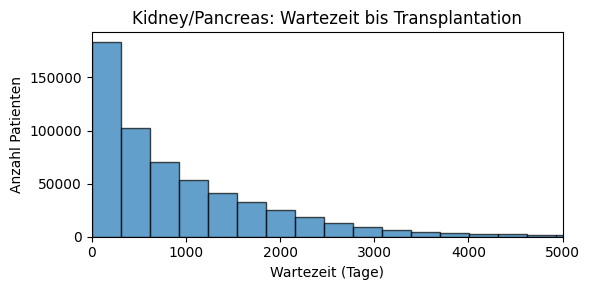

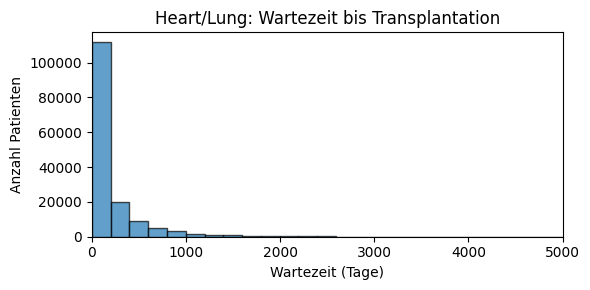

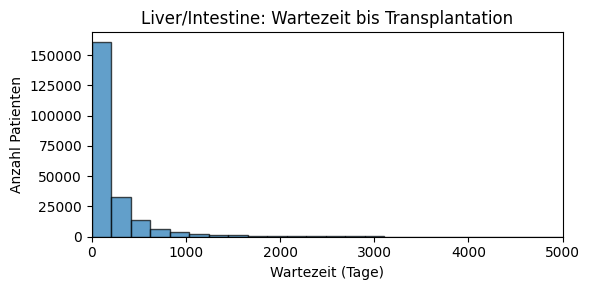

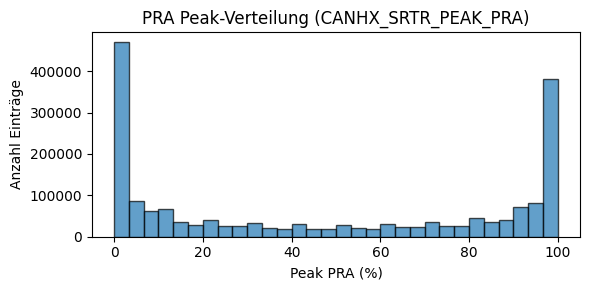

In [9]:
def plot_waiting_time(cand_df, tx_df, cohort_name):
    # Mergen und Wartezeit berechnen
    merged = (
        cand_df[['PX_ID', 'CAN_ACTIVATE_DT']]
        .merge(tx_df[['PX_ID', 'REC_TX_DT']], on='PX_ID', how='left')
    )
    merged['CAN_ACTIVATE_DT'] = pd.to_datetime(merged['CAN_ACTIVATE_DT'], errors='coerce')
    merged['REC_TX_DT'] = pd.to_datetime(merged['REC_TX_DT'], errors='coerce')
    merged['waiting_days'] = (merged['REC_TX_DT'] - merged['CAN_ACTIVATE_DT']).dt.days

    # nur nicht-negative Wartezeiten werden ausgewählt
    waiting = merged['waiting_days'].dropna()
    waiting = waiting[waiting >= 0]

    # Plot
    plt.figure(figsize=(6, 3))
    plt.hist(waiting, bins=50, alpha=0.7, edgecolor='black')
    plt.title(f"{cohort_name}: Wartezeit bis Transplantation")
    plt.xlabel("Wartezeit (Tage)")
    plt.ylabel("Anzahl Patienten")
    plt.xlim(0, 5000)
    plt.tight_layout()
    plt.show()

def plot_pra_distribution(pra_df):
    values = pra_df['CANHX_SRTR_PEAK_PRA'].dropna()
    plt.figure(figsize=(6, 3))
    plt.hist(values, bins=30, alpha=0.7, edgecolor='black')
    plt.title("PRA Peak-Verteilung (CANHX_SRTR_PEAK_PRA)")
    plt.xlabel("Peak PRA (%)")
    plt.ylabel("Anzahl Einträge")
    plt.tight_layout()
    plt.show()

# Kidney/Pancreas
kp_cand = dfs['cand_kipa']
kp_tx  = pd.concat([dfs['tx_ki'], dfs['tx_kp']], ignore_index=True)
plot_waiting_time(kp_cand, kp_tx, "Kidney/Pancreas")

# Heart/Lung
hl_cand = dfs['cand_thor']
hl_tx   = pd.concat([dfs['tx_hr'], dfs['tx_lu'], dfs['tx_hl']], ignore_index=True)
plot_waiting_time(hl_cand, hl_tx, "Heart/Lung")

# Liver/Intestine
li_cand = dfs['cand_liin']
li_tx   = pd.concat([dfs['tx_li'], dfs['tx_in']], ignore_index=True)
plot_waiting_time(li_cand, li_tx, "Liver/Intestine")

# PRA-Verteilung
pra_df = dfs['pra_hist']
plot_pra_distribution(pra_df)


3. Untersuchung der BMI der Kandidaten


--- Kidney/Pancreas: BMI Summary (cleaned) ---
                   count       mean       std   min   25%   50%   75%   max
treatment_flag                                                             
False           535730.0  28.196789  5.886994  10.0  24.0  28.0  32.0  60.0
True            602160.0  27.128712  5.815018  10.0  23.0  27.0  31.0  60.0


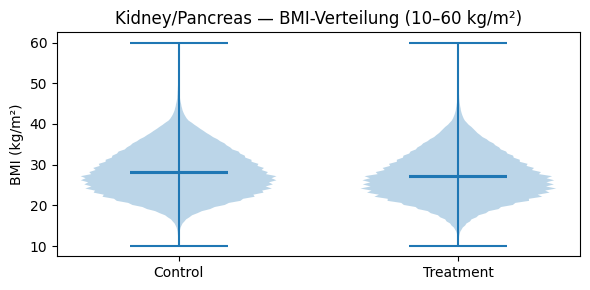


--- Heart/Lung: BMI Summary (cleaned) ---
                   count       mean       std   min   25%   50%   75%   max
treatment_flag                                                             
False            68792.0  25.751744  6.219837  10.0  22.0  26.0  30.0  60.0
True            152654.0  25.410824  5.587606  10.0  22.0  25.0  29.0  60.0


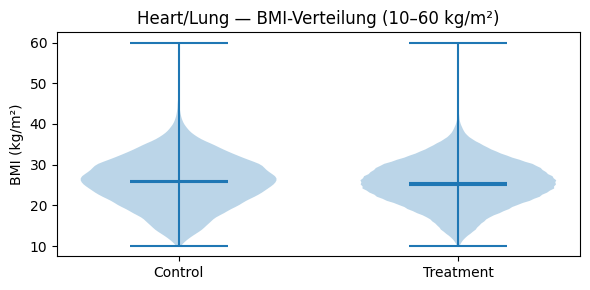


--- Liver/Intestine: BMI Summary (cleaned) ---
                   count       mean       std   min   25%   50%   75%   max
treatment_flag                                                             
False           151243.0  27.705243  6.418658  10.0  23.0  27.0  32.0  60.0
True            223038.0  27.470485  6.566366  10.0  23.0  27.0  31.0  60.0


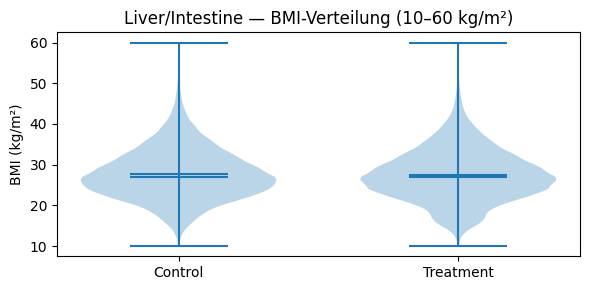

In [10]:
LOWER_BMI, UPPER_BMI = 10, 60  

def clean_and_plot_bmi_violin(cand_df, cohort_name):

    if "treatment_flag" not in cand_df.columns:
        raise ValueError("Bitte zuerst treatment_flag definieren.")
    
    df = cand_df.copy()
    # Nur plausible BMI-Werte werden aufgenommen
    mask = df['CAN_BMI'].between(LOWER_BMI, UPPER_BMI)
    clean = df.loc[mask, ['treatment_flag', 'CAN_BMI']]
    
    # DS
    print(f"\n--- {cohort_name}: BMI Summary (cleaned) ---")
    print(clean.groupby('treatment_flag')['CAN_BMI'].describe())
    
    # Daten für Control und Treatment
    data_ctl = clean.loc[~clean['treatment_flag'], 'CAN_BMI']
    data_trt = clean.loc[ clean['treatment_flag'], 'CAN_BMI']
    
    # Violin-Plot
    plt.figure(figsize=(6, 3))
    parts = plt.violinplot(
        [data_ctl, data_trt],
        positions=[1, 2],
        widths=0.7,
        showmeans=True,
        showmedians=True
    )
    plt.xticks([1, 2], ['Control', 'Treatment'])
    plt.title(f"{cohort_name} — BMI-Verteilung (10–60 kg/m²)")
    plt.ylabel("BMI (kg/m²)")
    plt.tight_layout()
    plt.show()

clean_and_plot_bmi_violin(dfs['cand_kipa'], "Kidney/Pancreas")

clean_and_plot_bmi_violin(dfs['cand_thor'], "Heart/Lung")

clean_and_plot_bmi_violin(dfs['cand_liin'], "Liver/Intestine")


4. Funktionaler Status: Analyse, ob behandelte Kandidaten vcn Listing besser funktionieren

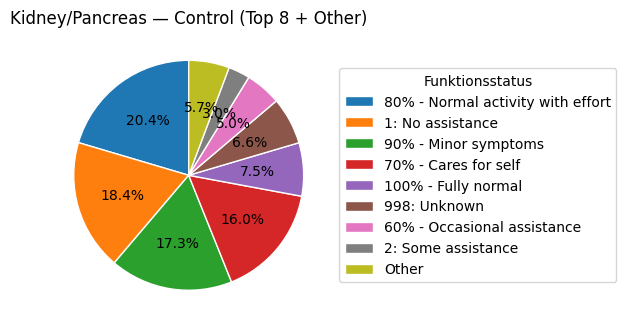

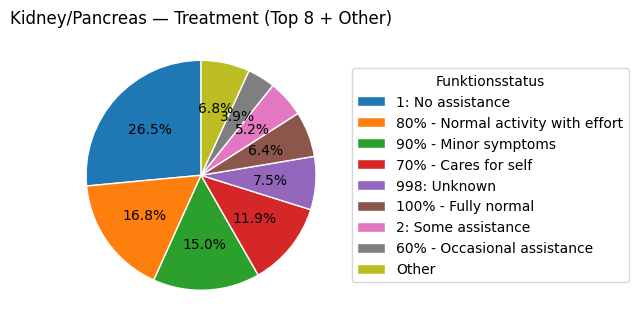

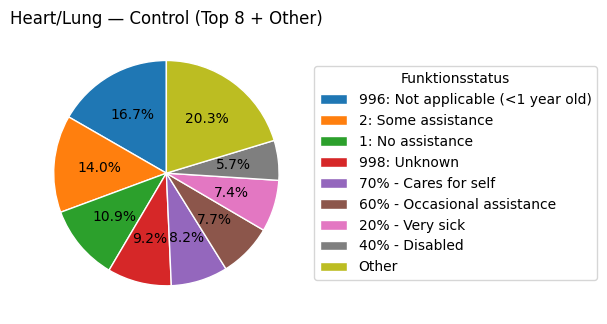

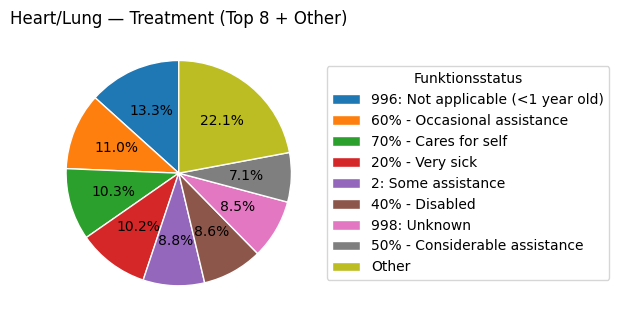

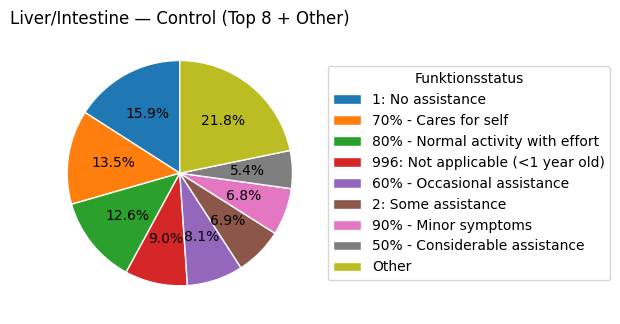

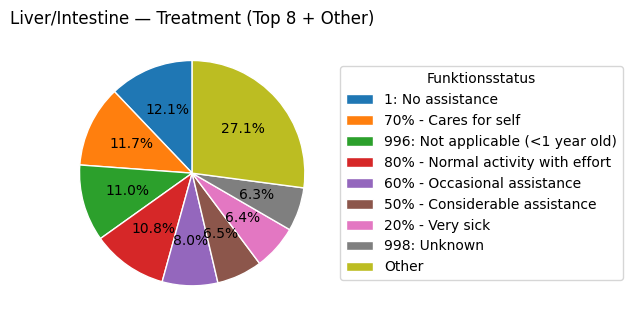

In [16]:
# Mapping 
funcstat_map = {
    1:  "1: No assistance",
    2:  "2: Some assistance",
    3:  "3: Total assistance",
    996:"996: Not applicable (<1 year old)",
    998:"998: Unknown",
    2010:"10% - Moribund",
    2020:"20% - Very sick",
    2030:"30% - Severely disabled",
    2040:"40% - Disabled",
    2050:"50% - Considerable assistance",
    2060:"60% - Occasional assistance",
    2070:"70% - Cares for self",
    2080:"80% - Normal activity with effort",
    2090:"90% - Minor symptoms",
    2100:"100% - Fully normal",
    4010:"10% - No play",
    4020:"20% - Passive activities",
    4030:"30% - Needs assistance for play",
    4040:"40% - Quiet activities",
    4050:"50% - Dresses but minimal play",
    4060:"60% - Minimal active play",
    4070:"70% - Restricted play",
    4080:"80% - Active but tires",
    4090:"90% - Minor strenuous restrictions",
    4100:"100% - Fully active"
}

def analyze_funcstatus_top6_pie(cand_df, cohort_name):
    # Labling
    df = cand_df.copy()
    df['FUNCSTAT_LABEL'] = df['CAN_FUNCTN_STAT'].map(funcstat_map)
    df = df[df['FUNCSTAT_LABEL'].notna()]
    
    # Häufigkeiten 
    freq = (df
            .groupby('treatment_flag')['FUNCSTAT_LABEL']
            .value_counts(normalize=True)
            .unstack(fill_value=0))
    
    # Für jede Treatment-Gruppe
    for flag, title in zip(freq.index, ["Control", "Treatment"]):
        series = freq.loc[flag].sort_values(ascending=False)
        # Top 8 + Other -->Grund: Kreisdiagramm sieht unordentlich aus mit so vielen Merkmalen
        top6 = series.iloc[:8]
        others_sum = series.iloc[8:].sum()
        if others_sum > 0:
            top6['Other'] = others_sum

        # Plot
        fig, ax = plt.subplots(figsize=(6, 6))
        wedges, texts, autotexts = ax.pie(
            top6.values,
            labels=None,
            autopct="%.1f%%",
            startangle=90,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
        ax.set_title(f"{cohort_name} — {title} (Top 8 + Other)")

        ax.legend(
            wedges,
            top6.index,
            title="Funktionsstatus",
            loc="center left",
            bbox_to_anchor=(1.0, 0.5)
        )
        
        plt.tight_layout()
        plt.show()

analyze_funcstatus_top6_pie(dfs['cand_kipa'],  "Kidney/Pancreas")
analyze_funcstatus_top6_pie(dfs['cand_thor'], "Heart/Lung")
analyze_funcstatus_top6_pie(dfs['cand_liin'], "Liver/Intestine")


5. Dringlichkeits- und Status-Codes: Analyse der Verteilungen der Kohorten Priorisierungen (STATHIST_* und STATJUST_*), Analyse der zeitlichen Verlaufs der Status-Änderungen